# Step 1: Import Required Libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset 

In [6]:
file_path = '../data/customer_retention.xlsx'
df = pd.read_excel(file_path)

# Step 3: Basic Information and Overview

In [27]:
print(df.shape)  # Rows and Columns
print(df.info())  # Data types and non-null counts
print(df.describe())  # Statistical summary
print(df.isnull().sum()) # Catch missing values

(100000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   CustomerID                   100000 non-null  object        
 1   Name                         100000 non-null  object        
 2   Email                        100000 non-null  object        
 3   Age                          100000 non-null  int64         
 4   Gender                       100000 non-null  object        
 5   City                         100000 non-null  object        
 6   SignupDate                   100000 non-null  datetime64[ns]
 7   LastPurchaseDate             100000 non-null  datetime64[ns]
 8   TotalPurchases               100000 non-null  int64         
 9   TotalSpent                   100000 non-null  float64       
 10  CustomerSegment              100000 non-null  object        
 11  ProductCategor

# Step 4: Clean Column Names (optional step)

In [25]:
#df.columns = df.columns.str.strip().str.replace(' ', '_')


# Step 5: Strip whitespace and fix casing

In [26]:
df['Gender'] = df['Gender'].str.strip().str.title()
df['CustomerSegment'] = df['CustomerSegment'].str.strip().str.title()
df['City'] = df['City'].str.strip().str.title()

# Step 6: Convert Date Columns to Datetime Format

In [21]:
df["LastPurchaseDate"] = pd.to_datetime(df["LastPurchaseDate"], errors='coerce')
df["SignupDate"] = pd.to_datetime(df["SignupDate"], errors='coerce')

# Step 7: Days Since Last Purchase

In [22]:
current_date  = pd.to_datetime("2025-05-28")
df["DaysSinceLastPurchase"] = (current_date  - df["LastPurchaseDate"]).dt.days

# Step 8: Customer By Age Group

In [23]:
df["CustomerAgeGroup"] = pd.cut(df["Age"], bins=[17,25,35,50,70], labels=["18-25", "26-35", "36-50", "51+"])

# Step 9: Average Basket Value

In [24]:
#Replace those zeros with NaN
df.loc[df["TotalPurchases"] == 0, "TotalPurchases"] = np.nan

df["AverageBasketValue_Calculated"] = (df["TotalSpent"] / df["TotalPurchases"]).round(2)

# Step 10: Check for Outliers EX- customers with extremely high spend

In [25]:
outliers = df[df["TotalSpent"] > df["TotalSpent"].quantile(0.99)]
print("Top spenders:")
print(outliers[["CustomerID", "TotalSpent", "CustomerSegment"]].head())

Top spenders:
     CustomerID  TotalSpent CustomerSegment
99   CUST100099    10685.21         Regular
181  CUST100181    10172.87        One-Time
303  CUST100303     9091.02             VIP
317  CUST100317     9253.97         Regular
324  CUST100324    10169.06             VIP


# Step 11: CustomerTenure

In [26]:
current_date = pd.to_datetime("2025-05-28")
df["CustomerTenure"] = (current_date - df["SignupDate"]).dt.days

# Step 12:  Final Check

In [34]:
df.describe(include='all')
df.head()

,CustomerID,Name,Email,Age,Gender,City,SignupDate,LastPurchaseDate,TotalPurchases,TotalSpent,CustomerSegment,ProductCategoriesPurchased,CustomerSupportInteractions,AverageBasketValue,DaysSinceLastPurchase,CustomerAgeGroup,AverageBasketValue_Calculated,CustomerTenure
0,CUST100000,Angela Williams,tylerrussell@example.com,37,Male,Delhi,2023-07-16,2025-05-10,7.0,4283.53,Regular,"Beauty, Electronics",1,611.93,18,36-50,611.93,682
1,CUST100001,Isaiah Miles,lisagutierrez@example.com,37,Male,Mumbai,2024-05-24,2024-12-03,10.0,2580.12,One-Time,"Books, Electronics",2,258.01,176,36-50,258.01,369
2,CUST100002,Amy Washington,hallangela@example.com,23,Female,Hyderabad,2024-07-20,2024-12-04,5.0,2028.39,Regular,"Books, Toys, Home",2,405.68,175,18-25,405.68,312
3,CUST100003,Kristen Wiggins,leonarddavid@example.com,31,Female,Bangalore,2024-02-24,2025-04-11,5.0,3249.06,One-Time,"Electronics, Books",1,649.81,47,26-35,649.81,459
4,CUST100004,Paula Newton,roy91@example.com,34,Female,Chennai,2023-08-29,2025-02-19,6.0,748.08,Regular,Books,3,124.68,98,26-35,124.68,638


# Save to CSV

In [35]:
df.to_csv('customer_retention_V2.csv', index=False)
print("✅ File saved as 'customer_retention_V2.csv'")

✅ File saved as 'customer_retention_V2.csv'


# Exploratory Data Analysis (EDA)


# 1: Customer Distribution by Segment


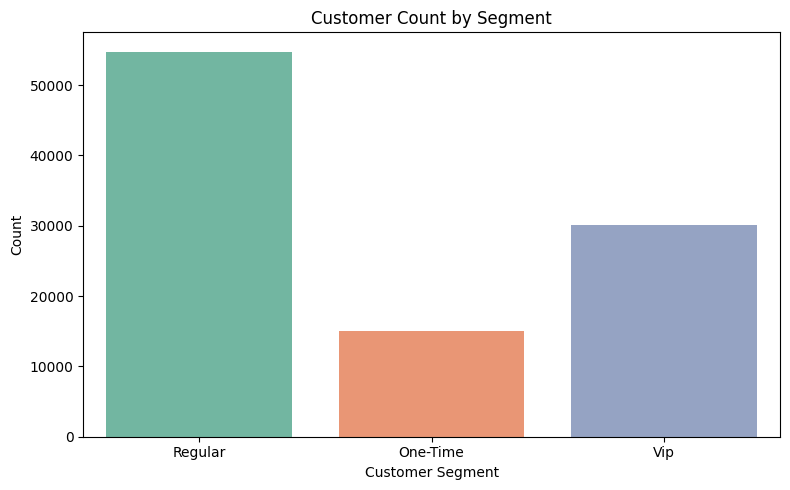

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CustomerSegment', hue='CustomerSegment', palette='Set2', legend=False)
plt.title('Customer Count by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 2: Gender Distribution


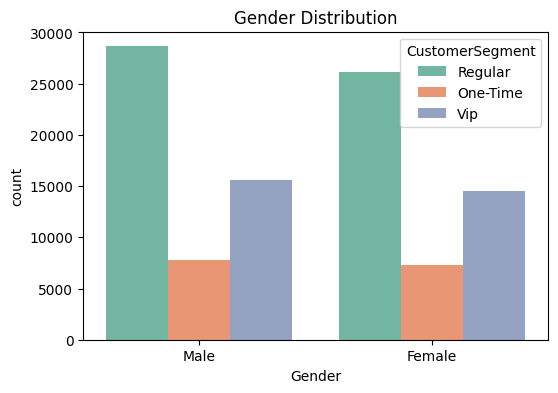

In [37]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender' , hue='CustomerSegment', palette='Set2')
plt.title('Gender Distribution')
plt.show()

# 3: Age Group Distribution


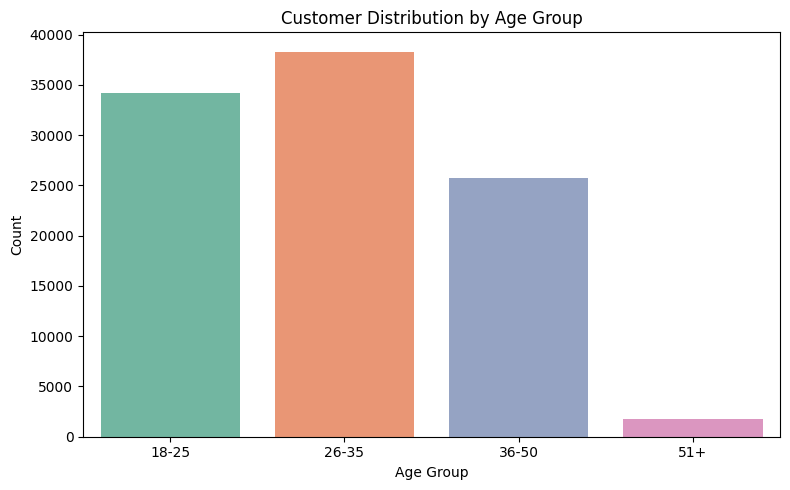

In [38]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='CustomerAgeGroup', hue='CustomerAgeGroup', order=["18-25", "26-35", "36-50", "51+"], palette='Set2', legend=False)
plt.title('Customer Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# 4: Top Cities by Customer Count

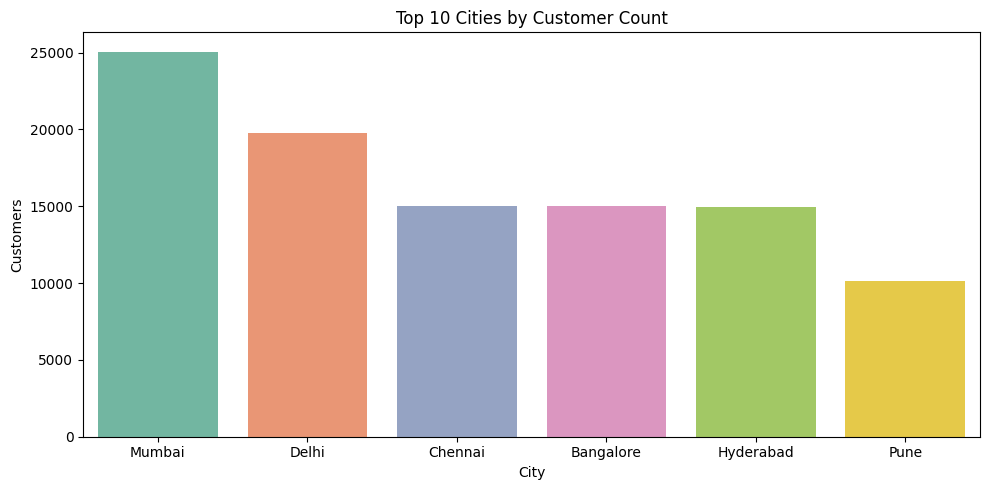

In [39]:
plt.figure(figsize=(10, 5))
top_cities = df['City'].value_counts().nlargest(10)

top_cities_df = top_cities.reset_index()
top_cities_df.columns = ['City', 'Count']

# Assign `City` also as `hue` and disable the legend to keep it clean
sns.barplot(data=top_cities_df, x='City', y='Count', hue='City', palette='Set2', dodge=False, legend=False)

plt.title('Top 10 Cities by Customer Count')
plt.xlabel('City')
plt.ylabel('Customers')
plt.tight_layout()
plt.show()


# 5: Total Spend by Segment (Boxplot)

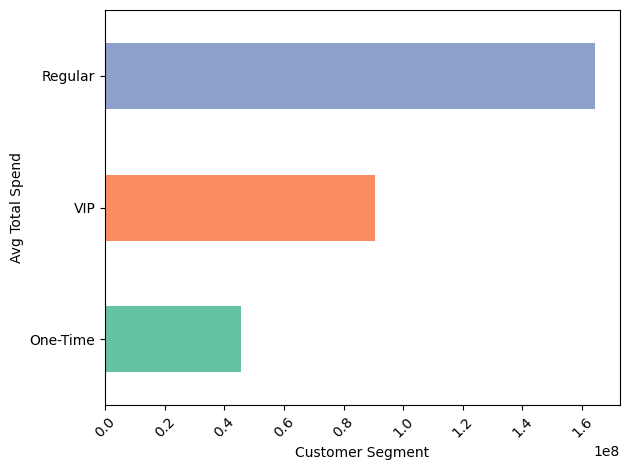

In [37]:
df.groupby('CustomerSegment')['TotalSpent'].sum().sort_values().plot(kind='barh', color=sns.color_palette('Set2'))

plt.xlabel('Customer Segment')
plt.ylabel('Avg Total Spend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6: Purchases vs Spending (Scatter)

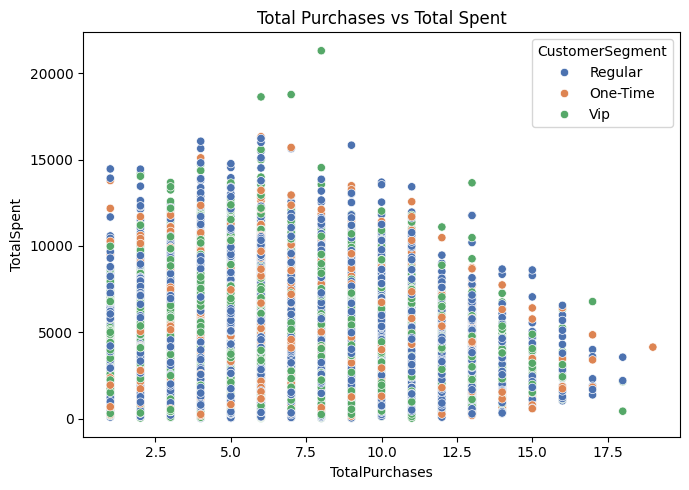

In [41]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='TotalPurchases', y='TotalSpent', hue='CustomerSegment', palette='deep')
plt.title('Total Purchases vs Total Spent')
plt.tight_layout()
plt.show()

# 7: Average Basket Value by Segment

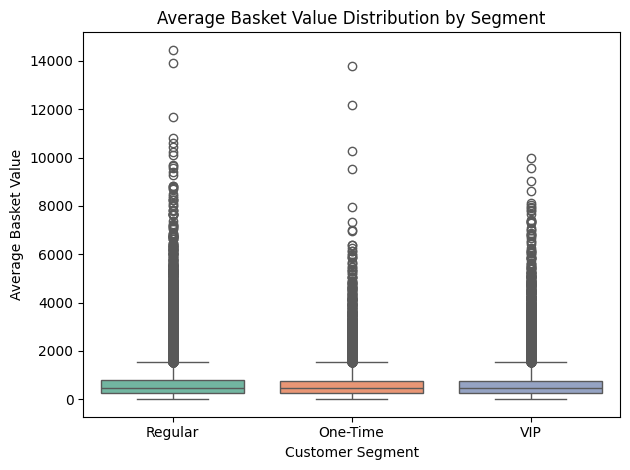

In [20]:
sns.boxplot(data=df, x='CustomerSegment', y='AverageBasketValue', hue='CustomerSegment', palette='Set2', dodge=False)
plt.title('Average Basket Value Distribution by Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Average Basket Value')
plt.legend([],[], frameon=False)  # Hide duplicate legend
plt.tight_layout()
plt.show()

# 8: Customer Tenure Distribution

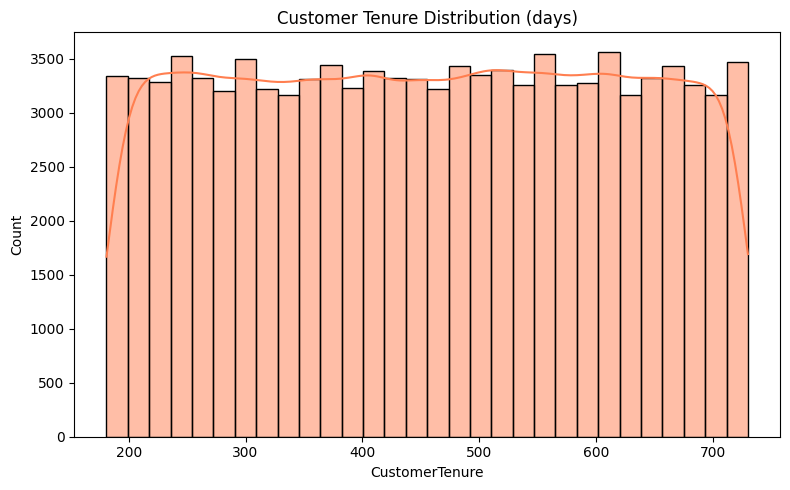

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df['CustomerTenure'], kde=True, bins=30, color='coral')
plt.title('Customer Tenure Distribution (days)')
plt.tight_layout()
plt.show()

<!-- ### 🎯 Key Takeaways
- Majority customers are in the 'Regular' segment.
- Top cities: Delhi, Mumbai, Bangalore.
- 25–34 age group dominates.
- Higher purchases usually result in higher spending.
- VIPs spend more per basket. -->


# Key Takeaways
- Majority customers are in the 'Regular' segment.
- Top cities: Mumbai, Delhi.
- 25–34 age group dominates.
- Higher purchases usually result in higher spending.
- VIPs spend more per basket.
